In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import font_manager
import matplotlib.font_manager as fm
from matplotlib.ticker import FuncFormatter
from matplotlib.sankey import Sankey
import matplotlib as mpl
import time

In [2]:
# Read data from the Excel file
df = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='Load', header=1)
df2 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='Purchased grid and gas', header=1)
df3 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='Electricity sources', header=1)
df4 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='Gas usage', header=1)

In [3]:
#Extract data columns
years = df.iloc[:, 0].tolist()
electric_load = df.iloc[:, 1].tolist()
cooling_load = df.iloc[:, 2].tolist()
heat_load = df.iloc[:, 3].tolist()
hot_water_load = df.iloc[:, 4].tolist()

years1 = df2.iloc[:, 0].tolist()
electricity_data = df2.iloc[:, 1].tolist()
gas_data = df2.iloc[:, 2].tolist()

years2 = df3.iloc[:, 0].tolist()
solar_data = df3.iloc[:, 1].tolist()
grid_data = df3.iloc[:, 2].tolist()
gas_turbine_data = df3.iloc[:, 3].tolist()
fuel_cell_data = df3.iloc[:, 4].tolist()

years3 = df4.iloc[:, 0].tolist()
boiler_data = df4.iloc[:, 1].tolist()
fuel_cell_data = df4.iloc[:, 2].tolist()
gas_turbine_data = df4.iloc[:, 3].tolist()
absorption_chill1_data = df4.iloc[:, 4].tolist()
absorption_chill2_data = df4.iloc[:, 5].tolist()
absorption_chill3_data = df4.iloc[:, 6].tolist()
avg_temperature_data = df4.iloc[:, 7].tolist()

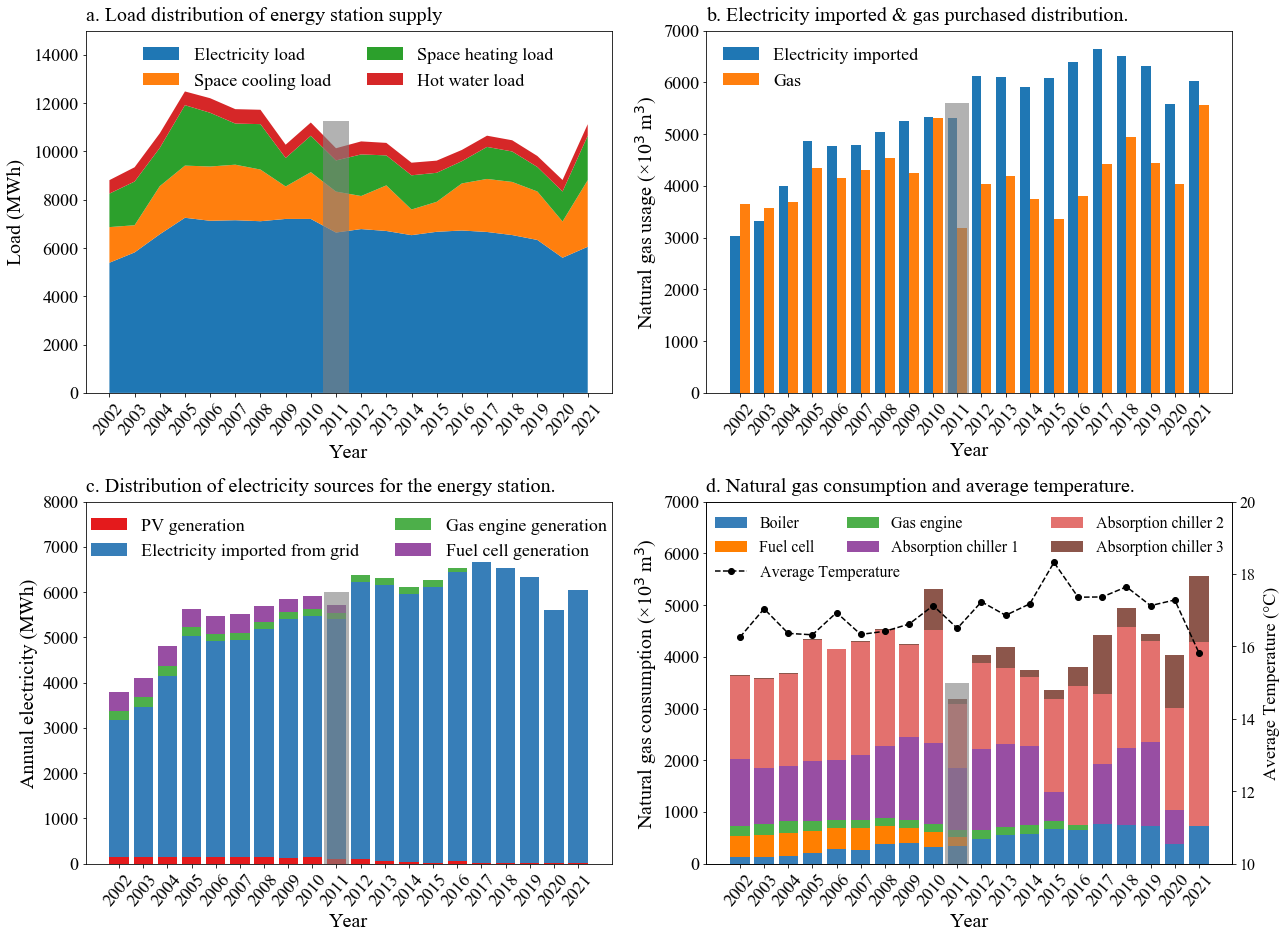

In [4]:
# Create the figure and subplots
fig, axs = plt.subplots(2, 2)
# Set the font
prop = fm.FontProperties(family='Times New Roman')

# Set the font type for the tick labels
font = {'family': 'Times New Roman'}
plt.rcParams['font.serif'] = 'Times New Roman'

# Plot 1: Stacked area plot
axs[0,0].stackplot(years, electric_load, cooling_load, heat_load, hot_water_load,
                 labels=['Electricity load', 'Space cooling load', 'Space heating load', 'Hot water load'],
                 colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
axs[0,0].set_xlabel('Year', fontname='Times New Roman', fontsize=20, labelpad=6)
axs[0,0].set_ylabel('Load (MWh)', fontname='Times New Roman', fontsize=20, labelpad=8)
axs[0,0].tick_params(axis='x', rotation=50)
axs[0,0].set_xticks(range(min(years), max(years) + 1, 1))
axs[0,0].set_ylim(0, 15000)
axs[0,0].set_yticks(range(0, 15001, 2000))
axs[0,0].set_xticklabels(axs[0,0].get_xticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=18))
axs[0,0].set_yticklabels(axs[0,0].get_yticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=18))

axs[0,0].tick_params(axis='both', labelsize=18)
axs[0,0].legend(loc='upper center', ncol=2, prop={'size': 18, 'family': 'Times New Roman'})
axs[0,0].get_legend().get_frame().set_alpha(0)
axs[0,0].get_legend().get_frame().set_edgecolor('none')
axs[0,0].axvspan(2010.5, 2011.5, ymin=0, ymax=0.75, facecolor='gray', alpha=0.6)
axs[0,0].set_title('a. Load distribution of energy station supply', fontname='Times New Roman', fontsize=20, pad=10, loc='left')

# Plot 2: Bar chart
bar_width = 0.4
index = np.arange(len(years1))

axs[0,1].bar(index, electricity_data, bar_width, color='#1f77b4', label='Electricity imported')
axs[0,1].set_xlabel('Year', fontname='Times New Roman', fontsize=20)
axs[0,1].set_ylabel('Electricity imported from grid (MWh)', fontname='Times New Roman', fontsize=20)
axs[0,1].tick_params(axis='y')
axs[0,1].set_ylim(0, 7000)
axs[0,1].set_yticks(np.arange(0, 7001, 1000))
axs[0,1].set_yticklabels(['{:.0f}'.format(x/1) for x in axs[0,1].get_yticks()], fontsize=18)
axs[0,1].set_xticklabels(axs[0,1].get_xticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=18))
axs[0,1].set_yticklabels(axs[0,1].get_yticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=18))
axs[0,1].bar(index + bar_width, gas_data, bar_width, color='#ff7f0e', label='Gas')
axs[0,1].set_ylabel(r'Natural gas usage (×10$^3$ m$^3$)', fontsize=20)
axs[0,1].tick_params(axis='y')
axs[0,1].set_ylim(0, 7000)
axs[0,1].set_yticks(np.arange(0, 7001, 1000))
axs[0,1].set_yticklabels(['{:.0f}'.format(x/1) for x in axs[0,1].get_yticks()], fontsize=18)
axs[0,1].axvspan(8.7, 9.7, ymin=0, ymax=0.8, facecolor='gray', alpha=0.6)
axs[0,1].set_xticks(index + bar_width / 2)
axs[0,1].set_xticklabels(years1, rotation=50, fontsize=18)
axs[0,1].legend(loc='upper left', prop={'size': 18, 'family': 'Times New Roman'})
axs[0,1].get_legend().get_frame().set_alpha(0)
axs[0,1].get_legend().get_frame().set_edgecolor('none')
axs[0,1].set_title('b. Electricity imported & gas purchased distribution.', fontname='Times New Roman', fontsize=20, pad=10, loc='left')

# Plot 3: 
colors = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3']
axs[1,0].bar(years2, solar_data, color=colors[0], label='PV generation')
axs[1,0].bar(years2, grid_data, bottom=solar_data, color=colors[1], label='Electricity imported from grid')
axs[1,0].bar(years2, gas_turbine_data, bottom=[solar + grid for solar, grid in zip(solar_data, grid_data)],
           color=colors[2], label='Gas engine generation')
axs[1,0].bar(years2, fuel_cell_data, bottom=[solar + grid + gas for solar, grid, gas in zip(solar_data, grid_data, gas_turbine_data)],
           color=colors[3], label='Fuel cell generation')
axs[1,0].set_xticks(years2)
axs[1,0].set_xticklabels(axs[1,0].get_xticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=18))
axs[1,0].set_yticklabels(axs[1,0].get_yticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=18))
axs[1,0].set_xlabel('Year', fontproperties=prop, fontsize=20, labelpad=4)
axs[1,0].set_ylabel('Annual electricity (MWh)', fontproperties=prop, fontsize=20)
axs[1,0].tick_params(axis='x', rotation=50, labelsize=18)
axs[1,0].tick_params(axis='y', labelsize=18)
#axs[1,0].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=2, prop={'size': 15, 'family': 'Times New Roman'})
axs[1,0].legend(loc='upper center', ncol=2, prop={'size': 18, 'family': 'Times New Roman'})
axs[1,0].get_legend().get_frame().set_alpha(0)
axs[1,0].get_legend().get_frame().set_edgecolor('none')
axs[1,0].set_ylim(0, 8000)
formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x / 1))
axs[1,0].yaxis.set_major_formatter(formatter)
axs[1,0].axvspan(2010.5, 2011.5, ymin=0, ymax=0.75, facecolor='gray', alpha=0.6)
axs[1,0].set_title('c. Distribution of electricity sources for the energy station.', fontname='Times New Roman', fontsize=20, pad=10, loc='left')

# Plot 4:
colors2 = ['#377eb8', '#ff7f00', '#4daf4a', '#984ea3', '#e3716e', '#8c564b']
axs[1,1].bar(years3, boiler_data, color=colors2[0], label='Boiler')
axs[1,1].bar(years3, fuel_cell_data, bottom=boiler_data, color=colors2[1], label='Fuel cell')
axs[1,1].bar(years3, gas_turbine_data, bottom=[boiler + fuel_cell for boiler, fuel_cell in zip(boiler_data, fuel_cell_data)],
           color=colors2[2], label='Gas engine')
axs[1,1].bar(years3, absorption_chill1_data, bottom=[boiler + fuel_cell + gas_turbine for boiler, fuel_cell, gas_turbine in zip(boiler_data, fuel_cell_data, gas_turbine_data)],
           color=colors2[3], label='Absorption chiller 1')
axs[1,1].bar(years3, absorption_chill2_data, bottom=[boiler + fuel_cell + gas_turbine + absorption_chill1 for boiler, fuel_cell, gas_turbine, absorption_chill1 in zip(boiler_data, fuel_cell_data, gas_turbine_data, absorption_chill1_data)],
           color=colors2[4], label='Absorption chiller 2')
axs[1,1].bar(years3, absorption_chill3_data, bottom=[boiler + fuel_cell + gas_turbine + absorption_chill1 + absorption_chill2 for boiler, fuel_cell, gas_turbine, absorption_chill1, absorption_chill2 in zip(boiler_data, fuel_cell_data, gas_turbine_data, absorption_chill1_data, absorption_chill2_data)],
           color=colors2[5], label='Absorption chiller 3')
# Create a twin Axes for the second subplot to have a separate y-axis for average temperature
ax2 = axs[1,1].twinx()
ax2.plot(years3, avg_temperature_data, linestyle='dashed', color='black', marker='o', label='Average Temperature')
ax2.set_ylabel('Average Temperature (°C)', fontproperties=prop, fontsize=18, labelpad=8)
ax2.tick_params(axis='y', labelsize=18)
ax2.set_yticklabels(ax2.get_yticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=16))
ax2.set_ylim(10, 20)
formatter2 = FuncFormatter(lambda x, pos: '{:.0f}'.format(x))
ax2.yaxis.set_major_formatter(formatter2)
ax2.legend(loc='upper left', bbox_to_anchor=(-0.01, 0.865), prop={'size': 16, 'family': 'Times New Roman'})
ax2.get_legend().set_alpha(0)
ax2.get_legend().get_frame().set_edgecolor('none')

axs[1,1].set_xticks(years3)
axs[1,1].set_xlabel('Year', fontproperties=prop, fontsize=20)
axs[1,1].set_ylabel('Natural gas consumption (×10$^3$ m$^3$)', fontproperties=prop, fontsize=20)
axs[1,1].tick_params(axis='x', rotation=50, labelsize=18)
axs[1,1].tick_params(axis='y', labelsize=18)
axs[1,1].set_xticklabels(axs[1,1].get_xticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=18))
axs[1,1].set_yticklabels(axs[1,1].get_yticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=18))
#axs[1,1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, prop={'size': 15, 'family': 'Times New Roman'})
axs[1,1].legend(loc='upper center', ncol=3, prop={'size': 16, 'family': 'Times New Roman'})
axs[1,1].get_legend().get_frame().set_alpha(0)
axs[1,1].get_legend().get_frame().set_edgecolor('none')
axs[1,1].set_ylim(0, 7000)
formatter = FuncFormatter(lambda x, pos: '{:.0f}'.format(x / 1))
axs[1,1].yaxis.set_major_formatter(formatter)
axs[1,1].axvspan(2010.5, 2011.5, ymin=0, ymax=0.5, facecolor='gray', alpha=0.6)
axs[1,1].set_title('d. Natural gas consumption and average temperature.', fontname='Times New Roman', fontsize=20, pad=10, loc='left')

# Adjust the layout and spacing between subplots
#plt.tight_layout()
plt.subplots_adjust(wspace=0.18, hspace=0.3)
# Set the figure size
fig.set_size_inches(18, 13)
plt.subplots_adjust(left=0.065, bottom=0.07, right=0.95, top=0.96)

# Save the plot
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Figure 3.svg'
plt.savefig(output_folder + output_filename, dpi=400, format='svg')

# Customize font settings

# Set font properties for x-axis and y-axis labels
# Display the figure
plt.show()

In [5]:
df5 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='All load1_2004&2019', header=1)

In [6]:
# Extraction time, power load data in 2004 and 2019
time = df5.iloc[:, 0]
Electricity_load_2004 = df5.iloc[:, 1]
Electricity_load_2019 = df5.iloc[:, 2]
temperature_2004 = df5.iloc[:, 3]
temperature_2019 = df5.iloc[:, 4]
Heating_load_2004 =  df5.iloc[:, 5]
Heating_load_2019 =  df5.iloc[:, 6]
Cooling_load_2004 =  df5.iloc[:, 7]
Cooling_load_2019 =  df5.iloc[:, 8]
Hot_water_load_2004 = df5.iloc[:, 9]
Hot_water_load_2019 = df5.iloc[:, 10]

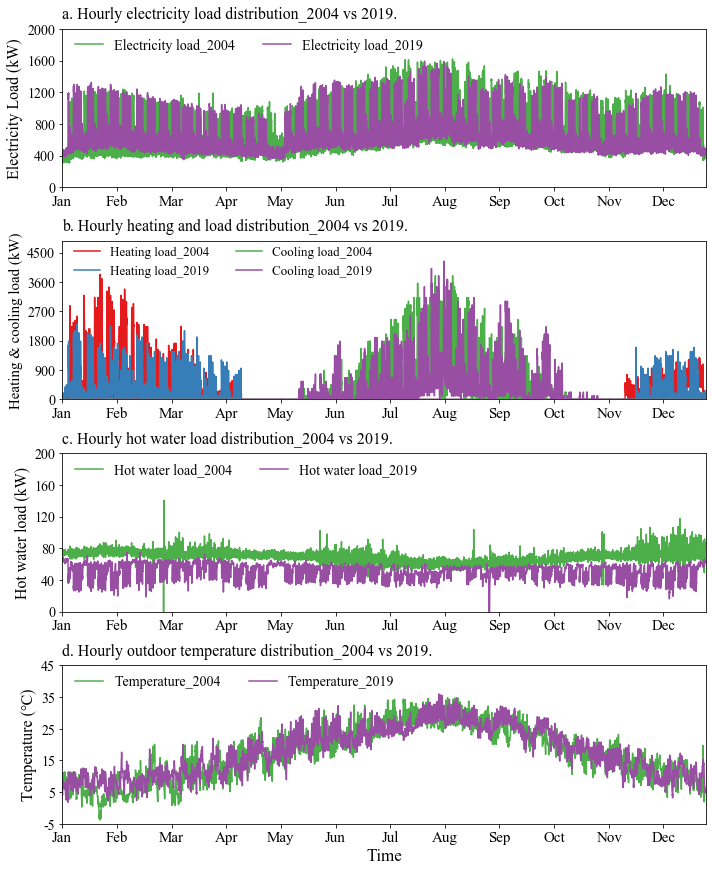

In [7]:
# Set the font
prop = fm.FontProperties(family='Times New Roman')

# Convert timestamp to date string
time_str = time.dt.strftime('%Y-%m-%d %H:%M:%S')


# Creating canvases and subgraphs
fig, axs = plt.subplots(4, 1, figsize=(10, 12))
colors2 = ['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3']

# Plot power load comparison
axs[0].plot(time_str, Electricity_load_2004, label='Electricity load_2004', color=colors2[2])
axs[0].plot(time_str, Electricity_load_2019, label='Electricity load_2019', color=colors2[3])
axs[0].set_title('a. Hourly electricity load distribution_2004 vs 2019.', fontname='Times New Roman', fontsize=16, pad=10, loc='left')
axs[0].set_ylim(0, 2000)
axs[0].set_yticks(np.arange(0, 2001, 400))
#axs[0].set_xlabel('Time', fontproperties=prop, fontsize=16)
axs[0].set_ylabel('Electricity Load (kW)', fontproperties=prop, fontsize=16)
axs[0].set_xticks(time_str[::744])
axs[0].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontproperties=font_manager.FontProperties(family='Times New Roman', size=15))
axs[0].set_yticklabels(axs[0].get_yticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=14))
axs[0].legend(loc='upper left', bbox_to_anchor=(0, 1.02), ncol=2, frameon=False, prop={'size': 14, 'family': 'Times New Roman'})
axs[0].margins(0)


# Plot heating and cooling load & temperature distribution
axs[1].plot(time_str, Heating_load_2004, label='Heating load_2004', color=colors2[0])
axs[1].plot(time_str, Heating_load_2019, label='Heating load_2019', color=colors2[1])
axs[1].plot(time_str, Cooling_load_2004, label='Cooling load_2004', color=colors2[2])
axs[1].plot(time_str, Cooling_load_2019, label='Cooling load_2019', color=colors2[3])
axs[1].set_title('b. Hourly heating and load distribution_2004 vs 2019.', fontname='Times New Roman', fontsize=16, pad=10, loc='left')
axs[1].set_ylim(0, 4850)
axs[1].set_yticks(np.arange(0, 4851, 900))
#axs[1].set_xlabel('Time', fontproperties=prop, fontsize=16)
axs[1].set_ylabel('Heating & cooling load (kW)', fontproperties=prop, fontsize=15)
axs[1].set_xticks(time_str[::744])
axs[1].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontproperties=font_manager.FontProperties(family='Times New Roman', size=15))
axs[1].set_yticklabels(axs[1].get_yticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=14))
axs[1].legend(loc='upper left', frameon=False)
axs[1].legend(loc='upper left', bbox_to_anchor=(0, 1.037), ncol=2, frameon=False, prop={'size': 13, 'family': 'Times New Roman'})
axs[1].margins(0)


# Plot cooling load & temperature distribution
axs[2].plot(time_str, Hot_water_load_2004, label='Hot water load_2004', color=colors2[2])
axs[2].plot(time_str, Hot_water_load_2019, label='Hot water load_2019', color=colors2[3])
axs[2].set_title('c. Hourly hot water load distribution_2004 vs 2019.', fontname='Times New Roman', fontsize=16, pad=10, loc='left')
axs[2].set_ylim(0, 200)
axs[2].set_yticks(np.arange(0, 201, 40))
#axs[2].set_xlabel('Time', fontproperties=prop, fontsize=16)
axs[2].set_ylabel('Hot water load (kW)', fontproperties=prop, fontsize=16)
axs[2].set_xticks(time_str[::744])
axs[2].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontproperties=font_manager.FontProperties(family='Times New Roman', size=15))
axs[2].set_yticklabels(axs[2].get_yticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=14))
axs[2].legend(loc='upper left', bbox_to_anchor=(0, 1.02), ncol=2, frameon=False, prop={'size': 14, 'family': 'Times New Roman'})
axs[2].margins(0)


# Add right y-axis for temperature
axs[3].plot(time_str, temperature_2004, label='Temperature_2004', color=colors2[2])
axs[3].plot(time_str, temperature_2019, label='Temperature_2019', color=colors2[3])
axs[3].set_title('d. Hourly outdoor temperature distribution_2004 vs 2019.', fontname='Times New Roman', fontsize=16, pad=10, loc='left')
axs[3].set_ylim(-5, 45)
axs[3].set_yticks(np.arange(-5, 46, 10))
axs[3].set_xlabel('Time', fontproperties=prop, fontsize=17)
axs[3].set_ylabel('Temperature (℃)', fontproperties=prop, fontsize=16)
axs[3].set_xticks(time_str[::744])
axs[3].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontproperties=font_manager.FontProperties(family='Times New Roman', size=15))
axs[3].set_yticklabels(axs[3].get_yticks(), fontproperties=font_manager.FontProperties(family='Times New Roman', size=14))
axs[3].legend(loc='upper left', bbox_to_anchor=(0, 1.02), ncol=2, frameon=False, prop={'size': 14, 'family': 'Times New Roman'})
axs[3].margins(0)


# Adjust spacing and size
plt.tight_layout()
plt.subplots_adjust(hspace=0.34) 
plt.subplots_adjust(top=0.97,bottom=0.05)
#fig.set_size_inches(16, 4)

# Save the plot
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Figure 4.svg'
plt.savefig(output_folder + output_filename, dpi=400, format='svg')

# Show the figure
plt.show()

In [8]:
# Read excel file data
df8 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='2002-2011_Electricity load', skiprows=1)
df9 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='2012-2021_Electricity load', skiprows=1)
df10 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='2002-2011_Electricity imported', skiprows=1)
df11 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='2012-2021_Electricity imported', skiprows=1)

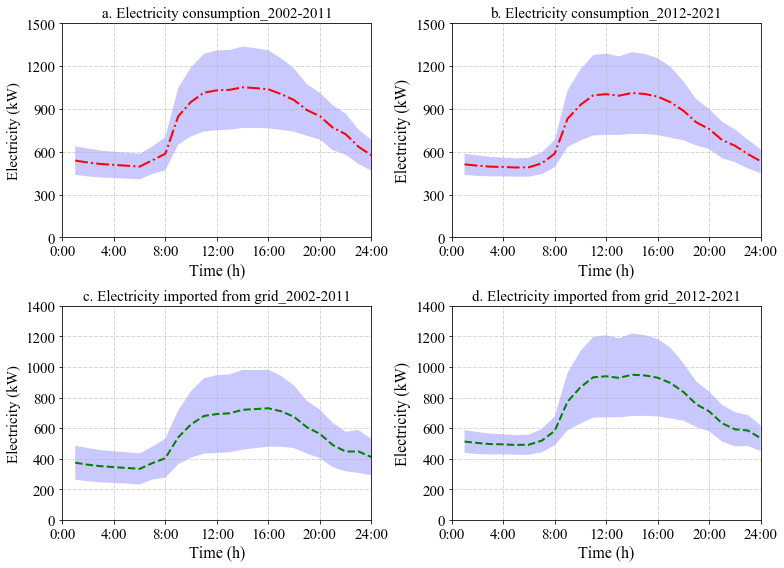

In [9]:
# Calculate the average and standard deviation of each column of data
y1 = df8.mean()
e1 = df8.std()
y2 = df9.mean()
e2 = df9.std()
y3 = df10.mean()
e3 = df10.std()
y4 = df11.mean()
e4 = df11.std()

# Create X-axis data
x1 = np.arange(1, len(y1) + 1)
x2 = np.arange(1, len(y2) + 1)
x3 = np.arange(1, len(y3) + 1)
x4 = np.arange(1, len(y4) + 1)

# Create a figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(11, 8))

# Plot data in the subplots
axs[0, 0].plot(x1, y1, '-.r', linewidth=2)
axs[0, 0].fill_between(x1, y1 - e1, y1 + e1, facecolor=[0.7, 0.7, 1], edgecolor='none', alpha=0.7)

# Set plot properties
axs[0, 0].set_ylim([0, 1500])
axs[0, 0].set_xlim([0, len(y1)])
font = fm.FontProperties(family='Times New Roman', size=15)
axs[0, 0].set_xticks([0, 4, 8, 12, 16, 20, 24])
axs[0, 0].set_xticklabels(['0:00', '4:00', '8:00', '12:00', '16:00', '20:00', '24:00'], fontproperties=font)
axs[0, 0].set_yticks([0, 300, 600, 900, 1200,1500])
axs[0, 0].set_yticklabels(['0', '300', '600', '900', '1200', '1500'], fontproperties=font)

axs[0, 0].spines['top'].set_visible(True)
axs[0, 0].spines['right'].set_visible(True)
axs[0, 0].spines['top'].set_linewidth(axs[0, 0].spines['bottom'].get_linewidth())  # Use the same line width as the bottom axis
axs[0, 0].spines['right'].set_linewidth(axs[0, 0].spines['left'].get_linewidth())  # Use the same line width as the left axis
axs[0, 0].spines['top'].set_color('black')
axs[0, 0].spines['right'].set_color('black')

axs[0, 0].xaxis.set_ticks_position('bottom')
axs[0, 0].yaxis.set_ticks_position('left')
axs[0, 0].grid(True, linestyle='-.', linewidth=0.5)

axs[0, 0].set_title('a. Electricity consumption_2002-2011',  fontfamily='Times New Roman', fontsize=15)  # Add the title of the plot
axs[0, 0].set_xlabel('Time (h)',  fontfamily='Times New Roman', fontsize=16)
axs[0, 0].set_ylabel('Electricity (kW)', fontfamily='Times New Roman', fontsize=15) 


# Plot data in the subplots
axs[0, 1].plot(x2, y2, '-.r', linewidth=2)
axs[0, 1].fill_between(x2, y2 - e2, y2 + e2, facecolor=[0.7, 0.7, 1], edgecolor='none', alpha=0.7)

# Set plot properties
axs[0, 1].set_ylim([0, 1500])
axs[0, 1].set_xlim([0, len(y2)])
font = fm.FontProperties(family='Times New Roman', size=15)
axs[0, 1].set_xticks([0, 4, 8, 12, 16, 20, 24])
axs[0, 1].set_xticklabels(['0:00', '4:00', '8:00', '12:00', '16:00', '20:00', '24:00'], fontproperties=font)
axs[0, 1].set_yticks([0, 300, 600, 900, 1200,1500])
axs[0, 1].set_yticklabels(['0', '300', '600', '900', '1200', '1500'], fontproperties=font)

axs[0, 1].spines['top'].set_visible(True)
axs[0, 1].spines['right'].set_visible(True)
axs[0, 1].spines['top'].set_linewidth(axs[0, 1].spines['bottom'].get_linewidth())  # Use the same line width as the bottom axis
axs[0, 1].spines['right'].set_linewidth(axs[0, 1].spines['left'].get_linewidth())  # Use the same line width as the left axis
axs[0, 1].spines['top'].set_color('black')
axs[0, 1].spines['right'].set_color('black')

axs[0, 1].xaxis.set_ticks_position('bottom')
axs[0, 1].yaxis.set_ticks_position('left')
axs[0, 1].grid(True, linestyle='-.', linewidth=0.5)

axs[0, 1].set_title('b. Electricity consumption_2012-2021',  fontfamily='Times New Roman', fontsize=15)  # Add the title of the plot
axs[0, 1].set_xlabel('Time (h)',  fontfamily='Times New Roman', fontsize=16)
axs[0, 1].set_ylabel('Electricity (kW)', fontfamily='Times New Roman', fontsize=16)


# Plot data in the subplots
axs[1, 0].plot(x3, y3, '--g', linewidth=2)
axs[1, 0].fill_between(x3, y3 - e3, y3 + e3, facecolor=[0.7, 0.7, 1], edgecolor='none', alpha=0.7)

# Set plot properties
axs[1, 0].set_ylim([0, 1400])
axs[1, 0].set_xlim([0, len(y3)])
font = fm.FontProperties(family='Times New Roman', size=15)
axs[1, 0].set_xticks([0, 4, 8, 12, 16, 20, 24])
axs[1, 0].set_xticklabels(['0:00', '4:00', '8:00', '12:00', '16:00', '20:00', '24:00'], fontproperties=font)
axs[1, 0].set_yticks([0, 200, 400, 600, 800,1000,1200,1400])
axs[1, 0].set_yticklabels(['0', '200', '400', '600', '800', '1000', '1200', '1400'], fontproperties=font)

axs[1, 0].spines['top'].set_visible(True)
axs[1, 0].spines['right'].set_visible(True)
axs[1, 0].spines['top'].set_linewidth(axs[1, 0].spines['bottom'].get_linewidth())  # Use the same line width as the bottom axis
axs[1, 0].spines['right'].set_linewidth(axs[1, 0].spines['left'].get_linewidth())  # Use the same line width as the left axis
axs[1, 0].spines['top'].set_color('black')
axs[1, 0].spines['right'].set_color('black')

axs[1, 0].xaxis.set_ticks_position('bottom')
axs[1, 0].yaxis.set_ticks_position('left')
axs[1, 0].grid(True, linestyle='-.', linewidth=0.5)

axs[1, 0].set_title('c. Electricity imported from grid_2002-2011',  fontfamily='Times New Roman', fontsize=15)  # Add the title of the plot
axs[1, 0].set_xlabel('Time (h)',  fontfamily='Times New Roman', fontsize=16)
axs[1, 0].set_ylabel('Electricity (kW)', fontfamily='Times New Roman', fontsize=15) 


# Plot data in the subplots
axs[1, 1].plot(x4, y4, '--g', linewidth=2)
axs[1, 1].fill_between(x4, y4 - e4, y4 + e4, facecolor=[0.7, 0.7, 1], edgecolor='none', alpha=0.7)

# Set plot properties
axs[1, 1].set_ylim([0, 1400])
axs[1, 1].set_xlim([0, len(y4)])
font = fm.FontProperties(family='Times New Roman', size=15)
axs[1, 1].set_xticks([0, 4, 8, 12, 16, 20, 24])
axs[1, 1].set_xticklabels(['0:00', '4:00', '8:00', '12:00', '16:00', '20:00', '24:00'], fontproperties=font)
axs[1, 1].set_yticks([0, 200, 400, 600, 800, 1000, 1200, 1400])
axs[1, 1].set_yticklabels(['0', '200', '400', '600', '800', '1000', '1200', '1400'], fontproperties=font)

axs[1, 1].spines['top'].set_visible(True)
axs[1, 1].spines['right'].set_visible(True)
axs[1, 1].spines['top'].set_linewidth(axs[1, 1].spines['bottom'].get_linewidth())  # Use the same line width as the bottom axis
axs[1, 1].spines['right'].set_linewidth(axs[1, 1].spines['left'].get_linewidth())  # Use the same line width as the left axis
axs[1, 1].spines['top'].set_color('black')
axs[1, 1].spines['right'].set_color('black')

axs[1, 1].xaxis.set_ticks_position('bottom')
axs[1, 1].yaxis.set_ticks_position('left')
axs[1, 1].grid(True, linestyle='-.', linewidth=0.5)

axs[1, 1].set_title('d. Electricity imported from grid_2012-2021',  fontfamily='Times New Roman', fontsize=15)  # Add the title of the plot
axs[1, 1].set_xlabel('Time (h)',  fontfamily='Times New Roman', fontsize=16)
axs[1, 1].set_ylabel('Electricity (kW)', fontfamily='Times New Roman', fontsize=16)

plt.grid(True, linestyle='-.', linewidth=0.5)

# Adjust spacing between subplots

plt.tight_layout()
plt.subplots_adjust(wspace=0.26, hspace=0.32)
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Figure 5.svg'
plt.savefig(output_folder + output_filename, dpi=400, format='svg')

# Show the figure
plt.show()

In [10]:
df12 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='2002-2021', skiprows=1)

In [11]:
# 提取数据列
x1 = df12.iloc[1:122, 0]
y1 = df12.iloc[1:122, 1]
y2 = df12.iloc[1:122, 2]
x2 = df12.iloc[1:122, 3]
y3 = df12.iloc[1:122, 4]
y4 = df12.iloc[1:122, 5]

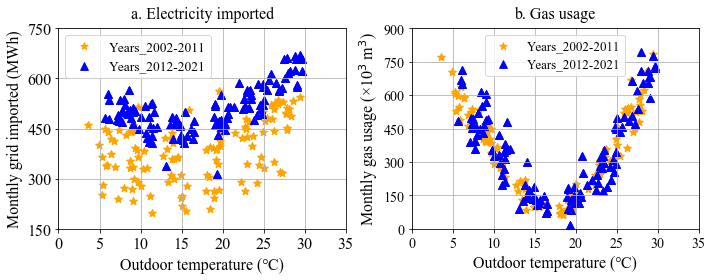

In [12]:
# Create a chart with two subgraphs
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Set the font
prop = fm.FontProperties(family='Times New Roman')

# Draw the first sub graph: the scatter diagram of the second column data with the first column data
axs[0].scatter(x1, y1, marker='*', color='orange', s=60)
scatter1 = axs[0].scatter(x1, y1, marker='*', color='orange', s=60)
# Draw the second sub graph: the scatter diagram of the third column of data with the first column of data
axs[0].scatter(x2, y3, marker='^', color='blue', s=60)
scatter2 = axs[0].scatter(x2, y3, marker='^', color='blue', s=60)
axs[0].set_xlabel('Outdoor temperature (℃)', fontproperties=prop, fontsize=16, labelpad=5)
axs[0].set_ylabel('Monthly grid imported (MWh)', fontproperties=prop, fontsize=16)
axs[0].set_title('a. Electricity imported', fontproperties=prop, fontsize=16, pad=10)
axs[0].set_xlim(0, 35)
axs[0].set_ylim(150, 750)
axs[0].set_xticks(np.arange(0, 36, 5))
axs[0].set_yticks(np.arange(150, 751, 150))
# Set font style and size for x and y tick labels
font = {'family': 'Times New Roman', 'size': 16}
axs[0].set_xticklabels(axs[0].get_xticks(), fontdict=font)
axs[0].set_yticklabels(axs[0].get_yticks(), fontdict=font)
axs[0].grid(True)
axs[0].legend([scatter1, scatter2], ['Years_2002-2011', 'Years_2012-2021'], loc='upper left', prop={'family': 'Times New Roman', 'size': 13.5})


# Draw the first sub graph: the scatter diagram of the second column data with the first column data
axs[1].scatter(x1, y2, marker='*', color='orange', s=60)
scatter3 = axs[1].scatter(x1, y2, marker='*', color='orange', s=60)
axs[1].scatter(x2, y4, marker='^', color='blue', s=60)
scatter4 = axs[1].scatter(x2, y4, marker='^', color='blue', s=60)
axs[1].set_xlabel('Outdoor temperature (℃)', fontproperties=prop, fontsize=16, labelpad=5)
axs[1].set_ylabel('Monthly gas usage (×10$^3$ m$^3$)', fontproperties=prop, fontsize=16)
axs[1].set_title('b. Gas usage', fontproperties=prop, fontsize=16, pad=10)
axs[1].set_xlim(0, 35)
axs[1].set_ylim(0, 900)
axs[1].set_xticks(np.arange(0, 36, 5))
axs[1].set_yticks(np.arange(0, 901, 150))
# Set font style and size for x and y tick labels
font = {'family': 'Times New Roman', 'size': 14}
axs[1].set_xticklabels(axs[1].get_xticks(), fontdict=font)
axs[1].set_yticklabels(axs[1].get_yticks(), fontdict=font)
axs[1].grid(True)
axs[1].legend([scatter3, scatter4], ['Years_2002-2011', 'Years_2012-2021'], prop={'family': 'Times New Roman', 'size': 13})

# Adjust spacing between subgraphs
plt.tight_layout()

# Adjust spacing between subplots
plt.subplots_adjust( wspace=0.23)

output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Figure 6.svg'
plt.savefig(output_folder + output_filename, dpi=400, format='svg')

# Show the figure
plt.show()

In [13]:
# Read data from the Excel file
df6 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='Gas usage_2002-2021_2')

In [14]:
# Extract data columns
seasons = df6.iloc[:, 0].tolist()
boiler_data = df6.iloc[:, 1].tolist()
fuel_cell_data = df6.iloc[:, 2].tolist()
gas_turbine_data = df6.iloc[:, 3].tolist()
absorption_chill1_data = df6.iloc[:, 4].tolist()

boiler_data2 = df6.iloc[:, 5].tolist()
fuel_cell_data2 = df6.iloc[:, 6].tolist()
gas_turbine_data2 = df6.iloc[:, 7].tolist()
absorption_chill1_data2 = df6.iloc[:, 8].tolist()

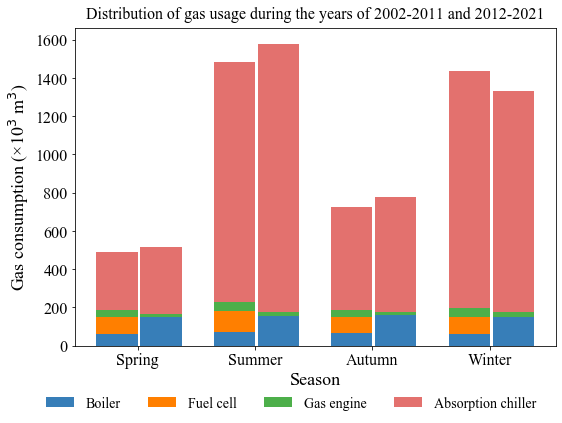

In [15]:
# Create a stacked bar chart
fig, ax = plt.subplots()

# Set the font
prop = fm.FontProperties(family='Times New Roman')

# Set the font and font size for the y-axis label
ax.set_ylabel('Gas consumption (×10$^3$ m$^3$)', fontproperties=prop, fontsize=18)

# Define the color of the bar chart
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#e3716e']

# Set the width of each group of histograms
bar_width = 0.35

# Calculate the position of the first set of histograms
bar_positions1 = np.arange(len(seasons))

# Draw the first set of stacked histograms
ax.bar(bar_positions1, boiler_data, bar_width, color=colors[0], label='Boiler')
ax.bar(bar_positions1, fuel_cell_data, bar_width, bottom=boiler_data, color=colors[1], label='Fuel cell')
ax.bar(bar_positions1, gas_turbine_data, bar_width, bottom=[boiler + fuel_cell for boiler, fuel_cell in zip(boiler_data, fuel_cell_data)],
       color=colors[2], label='Gas engine')
ax.bar(bar_positions1, absorption_chill1_data, bar_width, bottom=[boiler + fuel_cell + gas_turbine for boiler, fuel_cell, gas_turbine in zip(boiler_data, fuel_cell_data, gas_turbine_data)],
       color=colors[3], label='Absorption chiller')

# Calculate the position of the second set of histograms
bar_positions2 = bar_positions1 + bar_width - (bar_width / 10) + 0.06

# Draw the second set of stacked histograms
ax.bar(bar_positions2, boiler_data2, bar_width, color=colors[0])
ax.bar(bar_positions2, fuel_cell_data2, bar_width, bottom=boiler_data2, color=colors[1])
ax.bar(bar_positions2, gas_turbine_data2, bar_width, bottom=[boiler + fuel_cell for boiler, fuel_cell in zip(boiler_data2, fuel_cell_data2)],
       color=colors[2])
ax.bar(bar_positions2, absorption_chill1_data2, bar_width, bottom=[boiler + fuel_cell + gas_turbine for boiler, fuel_cell, gas_turbine in zip(boiler_data2, fuel_cell_data2, gas_turbine_data2)],
       color=colors[3])

# Set X-axis scale label
ax.set_xticks(bar_positions1 + bar_width / 2)
ax.set_xticklabels(seasons, fontproperties=prop, fontsize=14)

# Set the font and font size for legends and titles
#ax.set_xticks(seasons)
ax.set_xlabel('Season', fontproperties=prop, fontsize=18)
ax.set_title('Distribution of gas usage during the years of 2002-2011 and 2012-2021', fontproperties=prop, fontsize=16, pad=10)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=3, prop={'size': 14, 'family': 'Times New Roman'})
legend = ax.legend(loc='upper center', bbox_to_anchor=(0.45, -0.12), ncol=4, prop={'size': 14, 'family': 'Times New Roman'})
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# Set the rotation angle and font size of the x-axis scale label
plt.xticks(fontproperties=prop, fontsize=16)
plt.yticks(fontproperties=prop, fontsize=16)

# Set the figure size to accommodate the entire plot
fig = plt.gcf()
fig.set_size_inches(8, 6)  # Adjust the size as needed


# Save the plot
plt.tight_layout()
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Figure 7.svg'
plt.savefig(output_folder + output_filename, dpi=300, format='svg')


# Show the figure
plt.show()

In [16]:
# Read data from the Excel file
df7 = pd.read_excel('E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\Scientific data_Figure.xlsx', sheet_name='2009', header=1)

In [17]:
# Extract data columns
days = df7.iloc[:, 0]
heat_efficiency1 = df7.iloc[:, 1]
electric_efficiency1 = df7.iloc[:, 2]
total_efficiency1 = df7.iloc[:, 3]
heat_efficiency2 = df7.iloc[1:232, 7]
electric_efficiency2 = df7.iloc[1:232, 8]
total_efficiency2 = df7.iloc[1:232, 9]

heat_efficiency3 = df7.iloc[:, 4]
electric_efficiency3 = df7.iloc[:, 5]
total_efficiency3 = df7.iloc[:, 6]
heat_efficiency4 = df7.iloc[1:335, 10]
electric_efficiency4 = df7.iloc[1:335, 11]
total_efficiency4 = df7.iloc[1:335, 12]

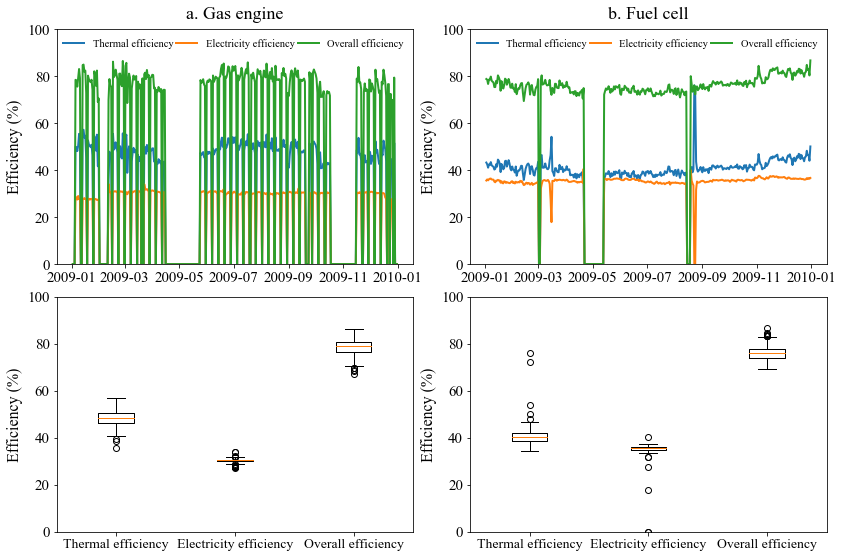

In [18]:
# Convert date to date time format
days = pd.to_datetime(days)

# Set the global font to Times New Roman
mpl.rcParams['font.family'] = 'Times New Roman'
mpl.rcParams['font.size'] = 15

# Create subgraph layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
# Customize font settings
font_prop = font_manager.FontProperties(family='Times New Roman')

# Draw a line chart
axs[0,0].plot(days, heat_efficiency1, linewidth=2, label='Thermal efficiency')
axs[0,0].plot(days, electric_efficiency1, linewidth=2, label='Electricity efficiency')
axs[0,0].plot(days, total_efficiency1, linewidth=2, label='Overall efficiency')
#axs[0,0].set_xlabel('Date', fontname='Times New Roman', fontsize=18)
axs[0,0].set_ylabel('Efficiency (%)', fontname='Times New Roman', fontsize=16)
axs[0,0].set_title('a. Gas engine', fontfamily='Times New Roman', fontsize=18, pad=10)
#axs[0,0].legend(loc='upper right',ncol=2, prop={'size': 10, 'family': 'Times New Roman'})
axs[0,0].set_ylim(0, 100)
axs[0,0].set_yticks(range(0, 101, 20))
legend = axs[0, 0].legend(loc='upper right', ncol=3, prop={'size': 10.5, 'family': 'Times New Roman'}, columnspacing=0.3)
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# Draw a box plot
efficiency_data_2 = [heat_efficiency2, electric_efficiency2, total_efficiency2]
boxprops = dict(linewidth=1) 
axs[1,0].boxplot(efficiency_data_2, boxprops=boxprops)
axs[1,0].set_xticklabels(['Thermal efficiency', 'Electricity efficiency', 'Overall efficiency'], fontproperties=font_prop, fontsize=13.8)
axs[1,0].set_ylabel('Efficiency (%)', fontname='Times New Roman', fontsize=16)
#axs[1].set_title('Efficiency Boxplot')
axs[1,0].set_ylim(0, 100)
axs[1,0].set_yticks(range(0, 101, 20))

# Draw a line chart
axs[0,1].plot(days, heat_efficiency3, linewidth=2, label='Thermal efficiency')
axs[0,1].plot(days, electric_efficiency3, linewidth=2, label='Electricity efficiency')
axs[0,1].plot(days, total_efficiency3, linewidth=2, label='Overall efficiency')
#axs[0,1].set_xlabel('Date', fontfamily='Times New Roman', fontsize=18)
axs[0,1].set_ylabel('Efficiency (%)', fontfamily='Times New Roman', fontsize=16)
axs[0,1].set_title('b. Fuel cell', fontfamily='Times New Roman', fontsize=18, pad=10)
#axs[0].set_title('Efficiency Variation')
#axs[0,1].legend(loc='upper right',ncol=3, prop={'size': 14, 'family': 'Times New Roman'})
axs[0,1].set_ylim(0, 100)
axs[0,1].set_yticks(range(0, 101, 20))
legend = axs[0,1].legend(loc='upper right',ncol=3, prop={'size': 10.5, 'family': 'Times New Roman'}, columnspacing=0.3)
legend.get_frame().set_alpha(0)
legend.get_frame().set_edgecolor('none')

# Draw a box plot
efficiency_data_4 = [heat_efficiency4, electric_efficiency4, total_efficiency4]
boxprops = dict(linewidth=1) 
axs[1,1].boxplot(efficiency_data_4, boxprops=boxprops)
axs[1,1].set_xticklabels(['Thermal efficiency', 'Electricity efficiency', 'Overall efficiency'], fontproperties=font_prop, fontsize=13.8)
axs[1,1].set_ylabel('Efficiency (%)', fontname='Times New Roman', fontsize=16)
#axs[1].set_title('Efficiency Boxplot')
axs[1,1].set_ylim(0, 100)
axs[1,1].set_yticks(range(0, 101, 20))
 
# Adjust the spacing between subgraphs
plt.tight_layout()
plt.subplots_adjust(hspace=0.14,wspace=0.16)

# Save the plot
output_folder = r'E:\Scientific_data_work_Kitakyushu_campus_building\Data Processing\Figure\\'
output_filename = 'Figure 8.svg'
plt.savefig(output_folder + output_filename, dpi=400, format='svg')

# Show the figure
plt.show()